# CAPESTONE PROJECT

**1.you are provided with the weekly sales data for their various outlets. 
Use statistical analysis, EDA, outlier analysis,
and handle the missing values to come up with various insights that can give a clear perspective on the following:**

a. If the weekly sales are affected by the unemployment rate , if yes - Which stores are suffering the most? 
b. If the weekly sales show a seasonal trend, when and what could be the reason? 
c. Does temperature affect the weekly sales in any manner? 
d. How is the consumer price affecting the weekly price of various stores? 
e. Top performing stores according to the historical data. 
f. The worst performing store, and how significant is the difference between the highest and lowest performing stores?

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
#Load and preprocess the dataset
# Load the dataset
data = pd.read_csv('Walmart.csv')

In [3]:
# Check for missing values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
# Handle missing values (example of filling with mean values)
data = data.fillna(data.mean())

C:\Users\saman\AppData\Local\Temp\ipykernel_16648\508334641.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


<Axes: >

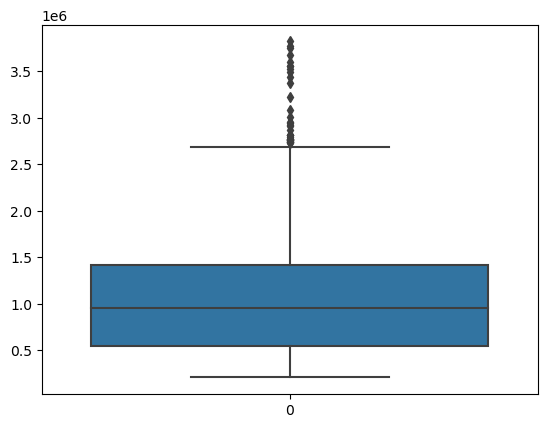

In [5]:
# Outlier analysis (example using boxplot)
sns.boxplot(data=data['Weekly_Sales'])

Text(0.5, 1.0, 'Weekly Sales vs Unemployment Rate')

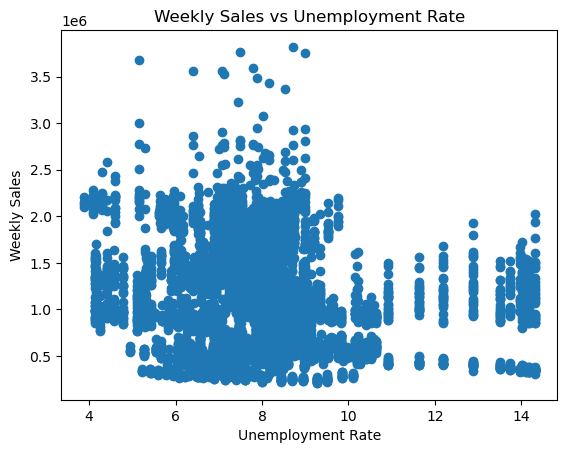

In [6]:
#Perform exploratory data analysis (EDA)
# Relationship between weekly sales and unemployment rate
plt.scatter(data['Unemployment'], data['Weekly_Sales'])
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs Unemployment Rate')

Text(0.5, 1.0, 'Seasonal Trend of Weekly Sales')

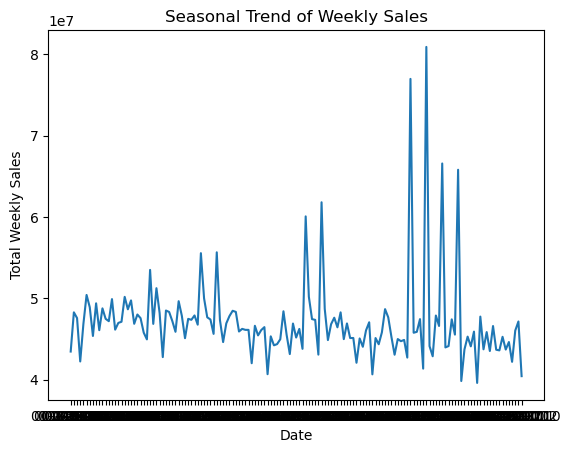

In [7]:
# Seasonal trend analysis (example using line plot)
weekly_sales_by_date = data.groupby('Date')['Weekly_Sales'].sum()
plt.plot(weekly_sales_by_date)
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.title('Seasonal Trend of Weekly Sales')

Text(0.5, 1.0, 'Weekly Sales vs Temperature')

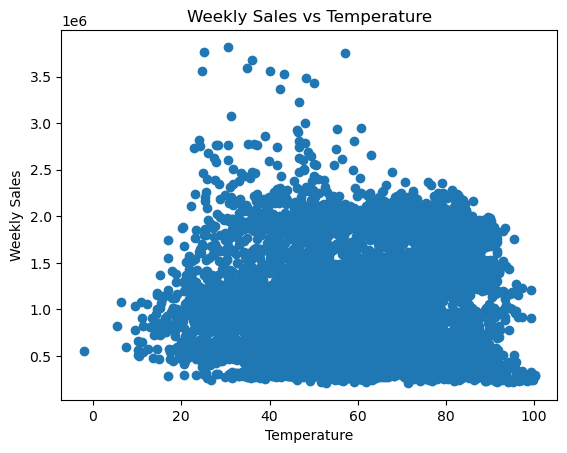

In [8]:
# Relationship between temperature and weekly sales
plt.scatter(data['Temperature'], data['Weekly_Sales'])
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs Temperature')

Text(0.5, 1.0, 'Consumer Price vs Average Weekly Sales')

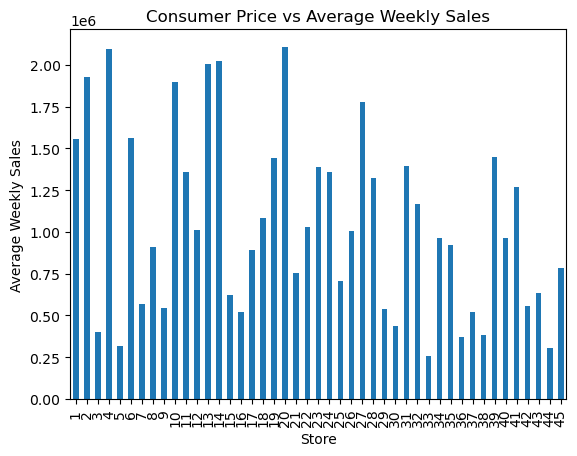

In [9]:
# Consumer price analysis (example using bar plot)
avg_sales_by_store = data.groupby('Store')['Weekly_Sales'].mean()
avg_sales_by_store.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Consumer Price vs Average Weekly Sales')

In [10]:
#Analyze top performing and worst performing stores
# Top performing stores
top_stores = avg_sales_by_store.nlargest(5)
print('Top Performing Stores:')
print(top_stores)

Top Performing Stores:
Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
Name: Weekly_Sales, dtype: float64


In [11]:
# Worst performing store
worst_store = avg_sales_by_store.idxmin()
print('Worst Performing Store:', worst_store)

Worst Performing Store: 33


In [12]:
# Difference between highest and lowest performing stores
difference = top_stores.iloc[0] - avg_sales_by_store.loc[worst_store]
print('Difference between highest and lowest performing stores:', difference)

Difference between highest and lowest performing stores: 1847815.1783216782


In [13]:
# Build the predictive model for each store
# Select relevant features and target variable
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
target = 'Weekly_Sales'

In [23]:
# Loop over each store and build the model
for store in data['Store'].unique():
# Subset the data for the store
     store_data = data[data['Store'] == store]    

In [16]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(store_data[features], store_data[target], test_size=0.2, random_state=42)

In [17]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [19]:
# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Store:', store, '- RMSE:', rmse)

Store: 45 - RMSE: 121450.65349771162


**2.Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.**

In [20]:
# Forecast sales for the next 12 weeks
future_dates = pd.date_range(start=store_data['Date'].max(), periods=12, freq='W')
future_data = pd.DataFrame({'Date': future_dates})
future_data = future_data.assign(Store=store)
future_data = pd.concat([store_data, future_data])
future_data[features] = future_data[features].fillna(method='ffill')
future_data['Weekly_Sales_Forecast'] = model.predict(future_data[features])
print(future_data[['Date', 'Store', 'Weekly_Sales_Forecast']])

                     Date  Store  Weekly_Sales_Forecast
6292           05-02-2010     45          846057.179597
6293           12-02-2010     45          846076.064395
6294           19-02-2010     45          841144.093679
6295           26-02-2010     45          834871.019672
6296           05-03-2010     45          830493.228928
...                   ...    ...                    ...
7     2011-02-20 00:00:00     45          784428.944283
8     2011-02-27 00:00:00     45          784428.944283
9     2011-03-06 00:00:00     45          784428.944283
10    2011-03-13 00:00:00     45          784428.944283
11    2011-03-20 00:00:00     45          784428.944283

[155 rows x 3 columns]


C:\Users\saman\AppData\Local\Temp\ipykernel_16648\1128226485.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  future_dates = pd.date_range(start=store_data['Date'].max(), periods=12, freq='W')
